# Atelier Python: Introduction à Seaborn
![Seaborn](https://assets.streamlinehq.com/image/private/w_300,h_300,ar_1/f_auto/v1/icons/2/seaborn-mazs5fsvs6lluqsnmeik89.png/seaborn-b4pddoh3hfg4k85ug0oazo.png?_a=DATAg1AAZAA0)

**contributeur Principaux : Atélier Numérique de l'OMP (Observatoire Midi-Pyrénées)**

**R.Guillaume & Velasquez**


**Présenté par F_Assene: Ecole d'été GGOSSS-2025**

![GGOSSS 2025](https://static.wixstatic.com/media/c030d3_ea7eb8d8e7524f02a790584333376eb9~mv2.png/v1/fill/w_1200,h_630,al_c/c030d3_ea7eb8d8e7524f02a790584333376eb9~mv2.png)

## Qu'est-ce que Seaborn et pourquoi l'utiliser?
- Outil de visualisation de données construit sur matplotlib
- Visualisations complexes rapidement réalisées
- Calculs statistiques simples
- Visuel (très) esthétique
- Optimisé pour des données sous forme de tableaux: **_pandas DataFrames_**


## Principales fonctionnalitées

### Quatre familles de visualisations :

* **Visualisations relationnelles**: 

Représenter et étudier le lien entre deux variables numériques.

* **Visualisations de distribution** : 

Représenter la distribution d'une variable numérique, que l'on peut grouper, aggréger, ...

* **Visualisations catégorique** :

Représenter des variables *catégoriques*, avec des valeurs discretes ou sous forme de chaine de caractère.

* **Visualisations de régression** :

Représenter des liens statistiques entre deux variables numériques.

### Des outils supplémentaires :

* Gestion de figures avec différentes grilles

* Différents thèmes d'affichage

* Gestion des couleurs et des colorbars

  

In [3]:
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import numpy as np
import pandas as pd
import random
from matplotlib_venn import venn2

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')


repertoire='/home/fernand/GGOSSS-2025/Python-Tutorial/3-Seaborn/'

In [4]:
%matplotlib inline

# Jeu de données exemple 1: 
# **Les voitures** : consommation, puissance, acceleration, ...

In [6]:
cars = pd.read_csv('../data/mpg.csv')
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


# RELPLOT: 
***Afficher les liens entre plusieurs variables numériques***
![image.png](../code/image.png)

## scatterplot (points) ou lineplot (lignes)

**Seaborn Background Color**
* 'darkgrid'
* 'white'
* 'dark'
* 'whitegrid'
* 'ticks'
  

<Figure size 1050x600 with 0 Axes>

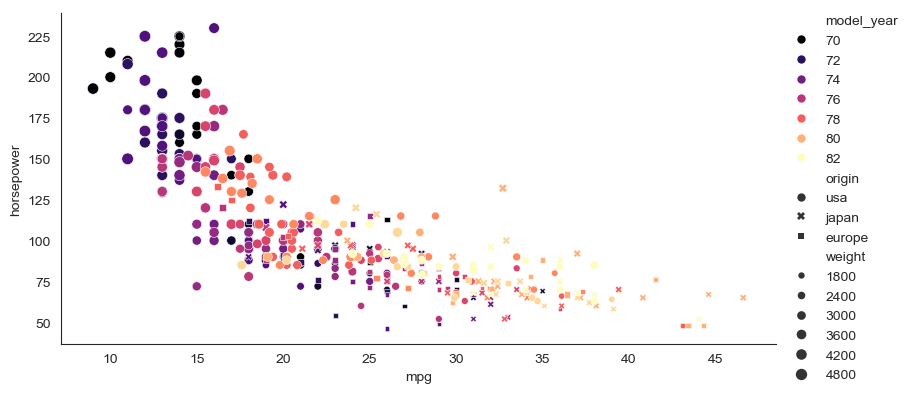

In [9]:
sns.set_style('white') 

fig = plt.figure(figsize=(7,4), dpi=150)

plot = sns.relplot(kind='scatter',#'line'
                   data=cars,
                   x='mpg',
                   y='horsepower',
                   hue='model_year',
                   size='weight',
                   style='origin',
                   #col='origin',
                   # col_wrap=1,
                   height=4, aspect=2,
                   palette='magma'
                   )
plot
plt.savefig(repertoire+'/fig/scatter_cars.png', dpi=fig.dpi, bbox_inches='tight')

plt.show()

<Figure size 1050x600 with 0 Axes>

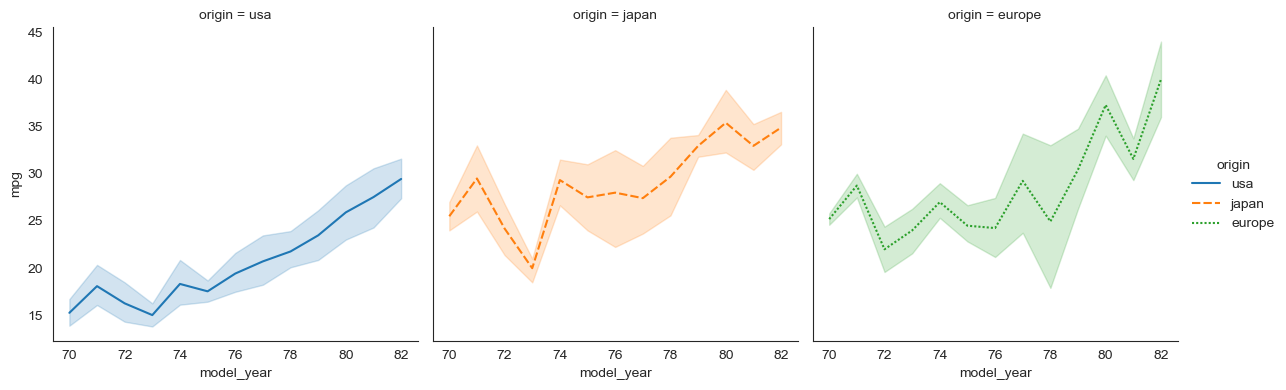

In [10]:
fig = plt.figure(figsize=(7,4), dpi=150)

plot = sns.relplot(kind='line',#'line'
                   data=cars,
                   x='model_year',
                   y='mpg',
                   hue='origin',
                   # size='weight',
                   style='origin',
                   col='origin',
                   # col_wrap = 4,
                   height=4, aspect=1,
                   )

plt.savefig(repertoire+'/fig/col_cars.png', dpi=fig.dpi, bbox_inches='tight')

plt.show()

# Jeu de données exemple 2: 
# **Les Manchots**

In [12]:
penguins = pd.read_csv('../data/penguins.csv')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


# DISPLOT: 

![image.png](../code/Image_2.png)

<Figure size 900x450 with 0 Axes>

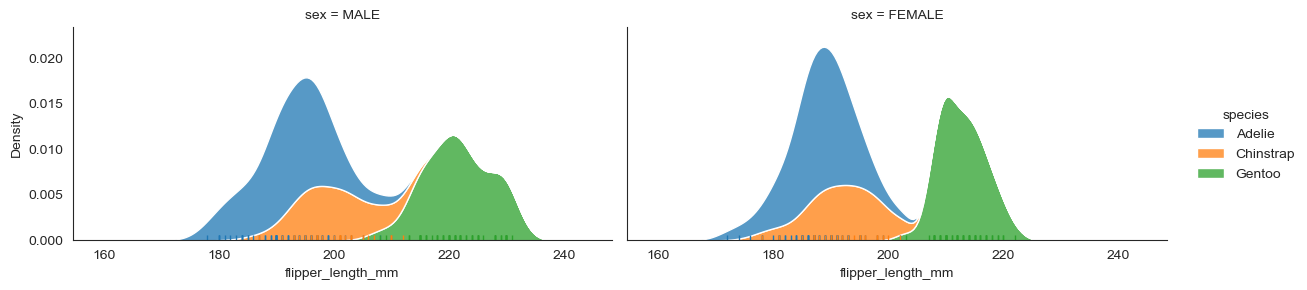

In [14]:
# 1d
fig = plt.figure(figsize=(6,3), dpi=150)

sns.displot(kind='kde',#'kde','hist','ecdf'  # kernel density function
            data=penguins,
            x = 'flipper_length_mm',
            col='sex',
            hue='species',
            rug=True,
            multiple='stack', #stack, fill, layer
            height=3, 
            aspect=2,
            #alpha=.9
            )
plt.savefig(repertoire+'/fig/pingouins_1d.png', dpi=fig.dpi, bbox_inches='tight')
plt.show()


## ajouter la valeur du **Skewness** (ceofficient d'assymétrie) pour chaque KDE

In [16]:

from scipy.stats import skew
import matplotlib.transforms as transforms

# Créer le FacetGrid
fig = plt.figure(figsize=(3,3), dpi=150)
g = sns.displot(
    kind='kde',
    data=penguins,
    x='flipper_length_mm',
    col='sex',
    hue='species',
    rug=True,
    multiple='stack', 
    height=3, 
    aspect=2
)

# Itérer sur les sous-graphiques pour ajouter les annotations
for ax, sex in zip(g.axes.flatten(), penguins['sex'].dropna().unique()):
    
    # Créer une transformation combinée
    # x-axis = coordonnées de données (transData)
    # y-axis = coordonnées d'axes (transAxes)
    blended_transform = transforms.blended_transform_factory(ax.transData, ax.transAxes)
    
    # Filtrer les données par sexe
    subset_sex = penguins[penguins['sex'] == sex]
    
    # Itérer sur chaque espèce pour le même sexe
    for i, species in enumerate(subset_sex['species'].dropna().unique()):
    
        # Choisir une couleur pour l'annotation
        if species == 'Adelie':
            color = 'blue'
            ha = 'center'
        elif species == 'Gentoo':
            color = 'green'
            ha = 'center'
        else: # Chinstrap
            color = 'red'
            ha = 'left'
            
        # Filtrer les données pour la combinaison sexe/espèce
        subset_species = subset_sex[subset_sex['species'] == species]
        
        if not subset_species.empty:
            data = subset_species['flipper_length_mm']
            
            # Calculer la moyenne et l'asymétrie
            mean_val = data.mean()
            skew_val = skew(data.dropna())

            # Calculer la KDE et trouver le point le plus haut (résultat pas correct, indicatif)
            kde = gaussian_kde(data)
            y_range = kde.evaluate(data)
            
            # Définir la position y (en coordonnées normalisées 0 à 1 parce que l'axe est transformé)            
            max_y = y_range.max()

            # Ajouter l'annotation sur le graphique en utilisant la transformation combinée
            ax.text(
                mean_val-0.01*mean_val, # Position x en coordonnées de données
                max_y+3*max_y, # Position y en coordonnées d'axes normalisées
                f'{skew_val:.2f}', 
                transform=blended_transform, # Utilisation de la transformation combinée
                ha=ha, 
                va='top',
                fontsize=9, 
                color='black',
                bbox=dict(boxstyle='round,pad=0.2', fc=color, ec=color, lw=0.3, alpha=0.15)
            )

# Ajuster le titre et la mise en page
g.fig.suptitle("Distribution de la longueur des ailerons par sexe et espèce", y=1.02)
plt.tight_layout()
plt.savefig(repertoire+'/fig/pingouins_1d_2.png', dpi=fig.dpi, bbox_inches='tight',transparent=True) 
plt.show()

NameError: name 'gaussian_kde' is not defined

## plt.savefig(..., **trasparent=True**)  permet d'enrégistrer une figure avec un arrière plan transparent

.

In [ ]:
#2d
fig = plt.figure(figsize=(5,4), dpi=150)

sns.displot(kind='kde',#'kde','hist'
            data=penguins,
            x = 'flipper_length_mm',
            y = 'bill_length_mm',
            fill=True,
            alpha=.7,
            hue='species',
            col='island',
            rug=True
            )
plt.savefig(repertoire+'/fig/pingouins_2d.png', dpi=fig.dpi, bbox_inches='tight')
plt.show()

# Jeu de données exemple 3: 
# Survivants du Titanic

In [ ]:
titanic = pd.read_csv('../data/titanic.csv')
titanic
titanic.describe(include='all') # statistique descriptive des donnees

# CATPLOT: 
Comparer des données par catégorie

On peut représenter :
* l'ensemble des valeurs (**stripplot**, **swarmplot**)
* des distributions (**violin**, **box**, **boxen**)
* des estimations (**pointplot**, **barplot**, **countplot**)



In [ ]:
sns.catplot(kind = 'point',#strip, violin, box, boxen, point
            data = titanic,
            x = 'fare',
            y = 'alive',
            hue='sex',
            row='alone',
            col='embark_town',
            # split=True, #if violin
            aspect =2, height=2
           )
plt.show()

In [ ]:
sns.catplot(kind = 'boxen',#strip, violin, box, boxen, point
            data = titanic,
            x = 'fare',
            # y = 'sex',
            # showfliers=False,
            hue='alive',
            # # row='alive',
            # col='embark_town',
            # split=True, #if violin
            aspect =2, height=2
           )
plt.show()

# Jeu de données exemple 4 : 
# Passagers de vols en avion

In [ ]:
flights = pd.read_csv('../data/flights.csv')
flights = flights.pivot(columns='year',index='month').passengers
flights

# HEATMAP: 
Représenter des données cycliques

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(flights, 
            cmap="gnuplot2",#viridis    
            square=True, 
            linewidth=2, 
            annot=True,
            fmt = '03d',
           )
plt.show()

# Displot +  Relplot avec **jointplot**

In [ ]:
plot = sns.jointplot(data=penguins, 
              x = 'flipper_length_mm',
              y = 'bill_length_mm',
              #kind='hex', # “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” 
              hue='species',
              #hue_order=['Chinstrap','Gentoo','Adelie'],
            )
#plt.grid()
plt.show()

# **pairplot** pour toutes les relations entre les variables

In [ ]:
sns.pairplot(penguins, 
             diag_kind='kde',#hist, kde, ecdf
             kind='scatter',#scatter,kde,hist
             # fill=True,
             hue='species', 
             palette='colorblind', 
             corner=True,
             hue_order=['Chinstrap','Gentoo','Adelie'],
             )
plt.show()

# Jeu de données exemple 5 : 
# **Exoplanètes**

In [ ]:
planets = pd.read_csv('../data/planets.csv')
planets

# Intégration avec matplotlib et styles différents

In [ ]:
# Choix du thème
sns.set_theme(style="whitegrid", palette="colorblind")

# Plot avec seaborn
plot = sns.displot(
    data=planets,
    # bins = np.arange(1990,2015),
    kind='hist',
    x='year',
    hue='method',
    multiple='stack',#fill
    edgecolor='white',
    aspect=2,
    shrink=0.9,
)

# Modifier la figure avec matplotlib
ax = plot.axes[0,0]
ax.grid(axis='y', alpha=.5)
ax.set_title("Méthode de découverte d'exoplanètes")
ax.set_ylabel("Nombre d'exoplanètes")
ax.set_xlabel("Année de découverte")
plot.legend.set_title('Méthode')
plt.show()

# Jeu de données exemple 6 : 
# **Les FastFoods**

In [ ]:
# Line Graph

# List of well-known fast food chains
restaurants = ["McDonald's", 'Yum! Brands', 'Restaurant Brands International', 'Shake Shack', "Domino's Pizza"]

# Define valid stock symbols or identifiers for each restaurant
restaurant_symbols = {
    "McDonald's": 'MCD',
    'Yum! Brands': 'YUM',
    'Restaurant BI': 'QSR',
    'Shake Shack': 'SHAK',
    "Domino's Pizza": 'DPZ'  # Using Domino's Pizza as a replacement for 'JFC.PH'
}

# Data Retrieval: Fetch historical stock data for each restaurant
data = yf.download(list(restaurant_symbols.values()), start='2022-01-01', end='2025-07-31')
data

# Extract only Adj Close prices
adj_close_data = {}

for restaurant, symbol in restaurant_symbols.items():
    if symbol in data.columns.get_level_values(1) and 'Close' in data.columns.get_level_values(0):
        adj_close_data[restaurant] = data['Close'][symbol]

adj_close_data = pd.DataFrame(adj_close_data)

#print(f"Adj Close prices shape: {adj_close_data.shape}")
#print("\nFirst few rows of Adj Close prices:")
#print(adj_close_data.head())

# Plot using clean DataFrame (Alternative method)
plt.figure(figsize=(12, 8))

for restaurant in adj_close_data.columns:
   plt.plot(adj_close_data.index, adj_close_data[restaurant], label=restaurant, linewidth=2, alpha=0.8)
    
plt.xlabel('Date')
plt.ylabel('Stock Price (Adjusted Close)')
plt.title('Stock Values of Fast Food Restaurants ($2022-2025$)')
plt.legend() # loc='upper left',ncols=3,framealpha=.1)  # Legend placement in the top right
#plt.grid(True)
plt.show()


## histogramme horizontal

In [ ]:
# Bar Graph

# List of well-known fast food chains
restaurants = ["McDonald's", 'Yum! Brands', 'RBI', 'Shake Shack', "Domino's Pizza"]

# Define valid stock symbols or identifiers for each restaurant
restaurant_symbols = {
    "McDonald's": 'MCD',
    'Yum! Brands': 'YUM',
    'RBI': 'QSR',
    'Shake Shack': 'SHAK',
    "Domino's Pizza": 'DPZ'
}

# Data Retrieval: Fetch historical stock data for each restaurant
data = yf.download(list(restaurant_symbols.values()), start='2022-01-01', end='2025-07-31')

# Extract the adjusted close prices for the last day of 2022
last_day_close_prices = data.loc['2024-12-30', 'Close']

# Define colors for the bars
colors = ['royalblue', 'forestgreen', 'tomato', 'orange', 'mediumorchid']

# Create a bar chart with different colors for each restaurant
plt.figure(figsize=(10, 6))
bars = plt.barh(list(restaurant_symbols.keys()), last_day_close_prices, color=colors)
plt.xlabel('Stock Price (Adjusted Close)')
plt.title('Stock Values of Fast Food Restaurants (Last Day of 2024)')

# Add a legend
legend_labels = [f'{restaurant}: ${price:.2f}' for restaurant, price in zip(restaurant_symbols.keys(), last_day_close_prices)]
plt.legend(bars, legend_labels, loc='upper right')

plt.grid(axis='x')
plt.show()


## diagramme en étoile

In [ ]:
# Radar Graph

# List of well-known fast food chains
restaurants = ["McDonald's", 'Yum! Brands', 'RBI', 'Shake Shack', "Domino's Pizza"]

# Define attributes or performance metrics for each restaurant
attributes = ['Revenue', 'Customer Satisfaction', 'Brand Recognition', 'Profit Margin', 'Market Share']

# Create a data dictionary with randomized attributes and values for each restaurant
data = {}

for restaurant in restaurants:
    data[restaurant] = [random.uniform(6, 9) for _ in range(len(attributes))]

# Create a radar chart
plt.figure(figsize=(8, 8))
angles = np.linspace(0, 2 * np.pi, len(attributes), endpoint=False).tolist()
angles += angles[:1]

for restaurant in restaurants:
    values = data[restaurant]
    values += values[:1]  # Close the plot
    plt.polar(angles, values, marker='o', label=restaurant)

plt.suptitle('Performance Comparison of Fast Food Restaurants (Randomized Data)')
plt.xticks(angles[:-1], attributes)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)

plt.show()


# Jeu de données exemple 7 : 
# **Autres jeux de données (iris, ...)**

## Correlogram
## relations croisées entre toutes les variables

In [ ]:
# Correlogram

df = sns.load_dataset('iris')
#data = pd.DataFrame(data)

# Basic correlogram
sns.pairplot(df)
#sns.pairplot(data)
plt.show()

## Pie Chart

In [ ]:
# Pie Chart
# Define data for a pie chart
car_brands = ['Toyota', 'Ford', 'Honda', 'Chevrolet', 'Volkswagen']
market_share = [25, 20, 15, 10, 30]  # Market share percentages for each car brand

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(market_share, labels=car_brands, autopct='%1.1f%%', startangle=140)
plt.title('Car Brand Market Share')

# Display the chart
plt.show()

## Stacked Area Chart

In [ ]:
# Stacked Area Chart

# Define data for a stacked area chart
years = [2010, 2011, 2012, 2013, 2014, 2015]
car_brands = ['Toyota', 'Ford', 'Honda', 'Chevrolet']
sales = {
    'Toyota': [10000, 12000, 11000, 13000, 14000, 15000],
    'Ford': [8000, 9500, 9000, 10000, 11000, 12000],
    'Honda': [7000, 8500, 8000, 9500, 10000, 10500],
    'Chevrolet': [6000, 7500, 7000, 8000, 8500, 9000]
}

# Create a stacked area chart
plt.figure(figsize=(10, 6))
plt.stackplot(years, sales.values(), labels=sales.keys(), alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Car Sales')
plt.title('Stacked Area Chart of Car Sales Over Time')
plt.legend(loc='upper left')

# Display the chart
plt.show()

## Venn Diagram

In [ ]:
# Venn Diagram

# Define the sets or groups
car_attributes = set(['Safety', 'Fuel Efficiency', 'Reliability', 'Performance','Brand'])
car_features = set(['Fuel Efficiency', 'Reliability', 'Comfort', 'Price'])

# Calculate the sizes and intersection
size_attributes = len(car_attributes)
size_features = len(car_features)
intersection_size = len(car_attributes.intersection(car_features))

# Create a Venn diagram
venn2(subsets=(size_attributes, size_features, intersection_size), set_labels=('Car Attributes', 'Car Features'))

# Display the diagram
plt.title("Venn Diagram for Car Attributes and Features")
plt.show()

## Histogram

In [ ]:
# Histogram

# Load the Iris dataset
df = sns.load_dataset('iris')

# Set a dark grid style
sns.set(style="white") # darkgrid

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot the first histogram
sns.histplot(data=df, x="sepal_length", ax=axes[0, 0])
axes[0, 0].set_title("Histogram (KDE=False)")

# Plot the second histogram with a KDE plot
sns.histplot(data=df, x="sepal_length", kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Histogram with KDE")

# Plot the third histogram using distplot (deprecated in Seaborn v0.11+)
sns.distplot(df["sepal_length"], ax=axes[1, 0])
axes[1, 0].set_title("distplot (deprecated)")

# Plot the fourth histogram with more bins
sns.histplot(data=df, x="sepal_length", bins=20, ax=axes[1, 1])
axes[1, 1].set_title("Histogram with 20 Bins"https://static.wixstatic.com/media/c030d3_ea7eb8d8e7524f02a790584333376eb9~mv2.png/v1/fill/w_1200,h_630,al_c/c030d3_ea7eb8d8e7524f02a790584333376eb9~mv2.png)

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

## Density Plot

In [ ]:
# Density Plot
# Load the Iris dataset
df = sns.load_dataset('iris')

fig= plt.figure(dpi=150)

# Set a dark grid style
sns.set(style="darkgrid")

# Create density plots for all four attributes
sns.kdeplot(data=df, x="sepal_length", fill=True, color="skyblue", label="Sepal Length")
sns.kdeplot(data=df, x="petal_length", fill=True, color="orange", label="Petal Length")
sns.kdeplot(data=df, x="sepal_width", fill=True, color="green", label="Sepal Width")
sns.kdeplot(data=df, x="petal_width", fill=True, color="red", label="Petal Width")

# Label and title
plt.xlabel('Measurements')
plt.ylabel('Density')
plt.title('Density Plot of Sepal and Petal Attributes in Iris Dataset')

plt.legend(loc=1,ncols=1)
plt.savefig(repertoire+'/fig/iris_kde.png', dpi=fig.dpi, bbox_inches='tight',transparent=False)

# Display the density plot
plt.show()


In [ ]:
# Load the Iris dataset
df = sns.load_dataset('iris')
#print(df.columns[0])
color = ["skyblue","green","orange","red"]
titre = [str(df.columns[i]) for i in range(4)]

fig= plt.figure(dpi=150)

for i, (var,cl,tt) in enumerate(zip(df,color,titre)):
    if var!="species":
        sns.kdeplot(data=df, x=var, fill=True, color=cl, label=tt)
        
plt.legend()
# Label and title
plt.xlabel('Measurements')
plt.ylabel('Density')
plt.title('Density Plot of Sepal and Petal Attributes in Iris Dataset')

plt.show()

In [ ]:
# Density Plot
# Set a dark grid style
sns.set(style="white")

# Load the Iris dataset
df = sns.load_dataset('iris')

fig, ax = plt.subplots(dpi=100)
plt.axis('off')  # faire disparaitre les axes (gauche, droite, haut et bas)

#
# Create density plots for all four attributes
sns.kdeplot(data=df, x="sepal_length", fill=True, color="skyblue", label="Sepal Length")
sns.kdeplot(data=df, x="petal_length", fill=True, color="orange", label="Petal Length")
sns.kdeplot(data=df, x="sepal_width", fill=True, color="green", label="Sepal Width")
sns.kdeplot(data=df, x="petal_width", fill=True, color="red", label="Petal Width")
#
# Label and title
#plt.title('Density Plot of Sepal and Petal Attributes in Iris Dataset')
# 
plt.legend(loc=2,ncols=1)
plt.savefig(repertoire+'/fig/iris_kde2.png', dpi=fig.dpi, bbox_inches='tight',transparent=True)

# Display the density plot
plt.show()


## Box Plot

In [ ]:
# Box Plot
# Load the Iris dataset
df = sns.load_dataset('iris')

# Set a dark grid style
sns.set(style="darkgrid")

# Create a box plot for sepal length by species
sns.boxplot(data=df, x="species", y="sepal_length", palette="Set2")

# Label and title
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.title('Box Plot of Sepal Length by Species in Iris Dataset')

# Display the box plot
plt.show()

## Violin Plot

In [ ]:
# Violin Plot

# Load the Iris dataset
df = sns.load_dataset('iris')

# Set a dark grid style
sns.set(style="darkgrid")

# Create a violin plot for sepal_length
sns.violinplot(data=df, x="species", y="sepal_length", palette="Set2")

# Label and title
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.title('Violin Plot of Sepal Length in Iris Dataset')
 
# Display the violin plot
plt.show()

# Jeu de données exemple 8 : 
## **Données sur les Films**

## Dot Plot

In [ ]:
ratings = df = pd.read_csv('../data/ratings.csv', encoding='utf-8', sep=',')
ratings

In [ ]:
# Dot Plot

# Set the background color for the plot
sns.set(rc={'axes.facecolor': 'lavender'})

ratings = df = pd.read_csv('../data/ratings.csv', encoding='utf-8', sep=',')

# Sort values by rating
ratings = ratings.sort_values(by=['You rated'])

# Loop to create a new variable for the dot plot
movie_count = []

for index, year in enumerate(ratings['Year']):
    subset = ratings.iloc[:index + 1]
    count = len(subset[subset['Year'] == year])
    movie_count.append(count)

# Data for the plot
x = ratings['Year']
y = movie_count
hue = ratings['You rated']

# Create a dot plot using the scatter plot function
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x=x, y=y, hue=hue, size=hue, palette="RdYlGn")
plt.legend()
#ax.get_legend().remove()  # Remove the default legend
plt.xlim([1950, 2020])  # Adjust the x-axis limits based on your data
plt.ylabel("Count", size=14)
plt.xlabel("Release year", size=14)
plt.title("Movies seen by year and rating", size=20)
plt.show()

# Jeu de données exemple 9 : 
# **espérance de vie à l'échelle mondiale**

## Chloropeth

In [ ]:
import plotly.express as px

# Sample data for choropleth map
data = px.data.gapminder()
data

In [ ]:
# Chloropeth
import plotly.express as px
#folium

# Sample data for choropleth map
data = px.data.gapminder()
#print(data.describe(include='all'))

# Create a choropleth map
fig = px.choropleth(
    data,
    locations="iso_alpha",  # ISO country codes
    color="lifeExp",  # pop, lifeExp, gpdPercap
    hover_name="country",  # Hover text
    animation_frame="year",  # Year as animation frame
    projection="natural earth",  # Map projection
    title="Life Expectancy Over Time",
    range_color=[20, 95]  # Set min and max values
)
# Update the colorbar after creation
#fig.update_layout(coloraxis_colorbar=dict(title="Life Exp", tickmode="array", tickvals=[0, 25, 45, 65, 80, 95],  
 #       ticktext=['Null', 'Low\n25', 'Med-Low\n45', 'Medium\n65', 'Med-High\n80', 'High\n90']))

# Save as HTML file
fig.write_html("choropleth_map.html")

# Show the map
fig.show()


# Jeu de données 8
# vol internationaux depuis le Brésil

In [ ]:
import pandas as pd
df = pd.read_csv("../data/BrFlights2.csv",  encoding="latin1",  on_bad_lines='skip') #error_bad_lines=False)
df

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

print("Available Pandas Datasets", gpd.datasets.available)

df = pd.read_csv("../data/BrFlights2.csv",encoding="latin1",  on_bad_lines='skip') # nrows=50000, error_bad_lines=False)
df = df[["Voos", "Companhia.Aerea","LongDest","LatDest","LongOrig","LatOrig", "Cidade.Origem", "Cidade.Destino", "Pais.Origem", "Pais.Destino"]]
print("Dataset Size : ",df.shape)
df.head()

overseas_df = df[(df["Pais.Origem"] != df["Pais.Destino"]) & (df["Pais.Destino"] != "Brasil")]
overseas_cnt_df = overseas_df.groupby(["LongDest","LatDest","LongOrig","LatOrig"]).count()[["Voos"]].rename(columns={"Voos":"Num_Of_Flights"}).reset_index()
overseas_cnt_df = overseas_cnt_df.merge(df, how="left", left_on=["LongDest","LatDest","LongOrig","LatOrig"], right_on=["LongDest","LatDest","LongOrig","LatOrig"])

print("International Travel Dataset Size : ", overseas_cnt_df.shape)

## Please make a note that we are only taking first 1k to make run easy.
overseas_cnt_df = overseas_cnt_df#.sample(frac=1.0).head(1000)

print("International Travel Dataset Size After Filtering : ", overseas_cnt_df.shape)

overseas_cnt_df.head()

brazil_df = df[df["Pais.Origem"] == df["Pais.Destino"]]
brazil_cnt_df = brazil_df.groupby(["LongDest","LatDest","LongOrig","LatOrig"]).count()[["Voos"]].rename(columns={"Voos":"Num_Of_Flights"}).reset_index()
brazil_cnt_df = brazil_cnt_df.merge(df, how="left", left_on=["LongDest","LatDest","LongOrig","LatOrig"], right_on=["LongDest","LatDest","LongOrig","LatOrig"])

print("Domestic Travel Dataset : ", brazil_cnt_df.shape)

## Please make a note that we are only taking first 5k to make run easy.
brazil_cnt_df = brazil_cnt_df#.sample(frac=1.0).head(5000)

print("Domestic Travel Dataset After Filtering: ", brazil_cnt_df.shape)

brazil_cnt_df.head()

fig = go.Figure()

source_to_dest = zip(overseas_cnt_df["LatOrig"], overseas_cnt_df["LatDest"],
                     overseas_cnt_df["LongOrig"], overseas_cnt_df["LongDest"],
                     overseas_cnt_df["Num_Of_Flights"])

## Loop thorugh each flight entry to add line between source and destination
for slat,dlat, slon, dlon, num_flights in source_to_dest:
    fig.add_trace(go.Scattergeo(
                        lat = [slat,dlat],
                        lon = [slon, dlon],
                        mode = 'lines',
                        line = dict(width = num_flights/100, color="red")
                        ))

## Logic to create labels of source and destination cities of flights
cities = overseas_cnt_df["Cidade.Origem"].values.tolist()+overseas_cnt_df["Cidade.Destino"].values.tolist()
countries = overseas_cnt_df["Pais.Origem"].values.tolist()+overseas_cnt_df["Pais.Destino"].values.tolist()
scatter_hover_data = [country + " : "+ city for city, country in zip(cities, countries)]

## Loop thorugh each flight entry to plot source and destination as points.
fig.add_trace(
    go.Scattergeo(
                lon = overseas_cnt_df["LongOrig"].values.tolist()+overseas_cnt_df["LongDest"].values.tolist(),
                lat = overseas_cnt_df["LatOrig"].values.tolist()+overseas_cnt_df["LatDest"].values.tolist(),
                hoverinfo = 'text',
                text = scatter_hover_data,
                mode = 'markers',
                marker = dict(size = 10, color = 'blue', opacity=0.1,))
    )

## Update graph layout to improve graph styling.
fig.update_layout(title_text="Connection Map Depicting Flights from Brazil to All Other Countries (Orthographic Projection)",
                  height=500, width=500,
                  margin={"t":0,"b":0,"l":0, "r":0, "pad":0},
                  showlegend=False, nrows=50000, 
                  geo= dict(projection_type = 'orthographic', showland = True, landcolor = 'lightblue', countrycolor = 'grey'))

# Save as HTML file
fig.write_html("flight_from_Brasil.html")

fig.show()